# 1 Dependencies import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.quickml.reader import read_csv
from scripts.quickml.plot import feature_distribution_univar, feature_filling, correlation_heatmap, feature_trend_bivar, feature_distribution_bivar, dataframe_distribution_overview
from scripts.quickml.compare import index_lth
from scripts.utils import fill_infos

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

np.random.seed(294697)

***
# 2 Data import

In [2]:
data = pd.read_csv("datas/sample.csv", index_col=[0], sep=";")

In [3]:
data.shape

(95978, 46)

***
# 3 Overview

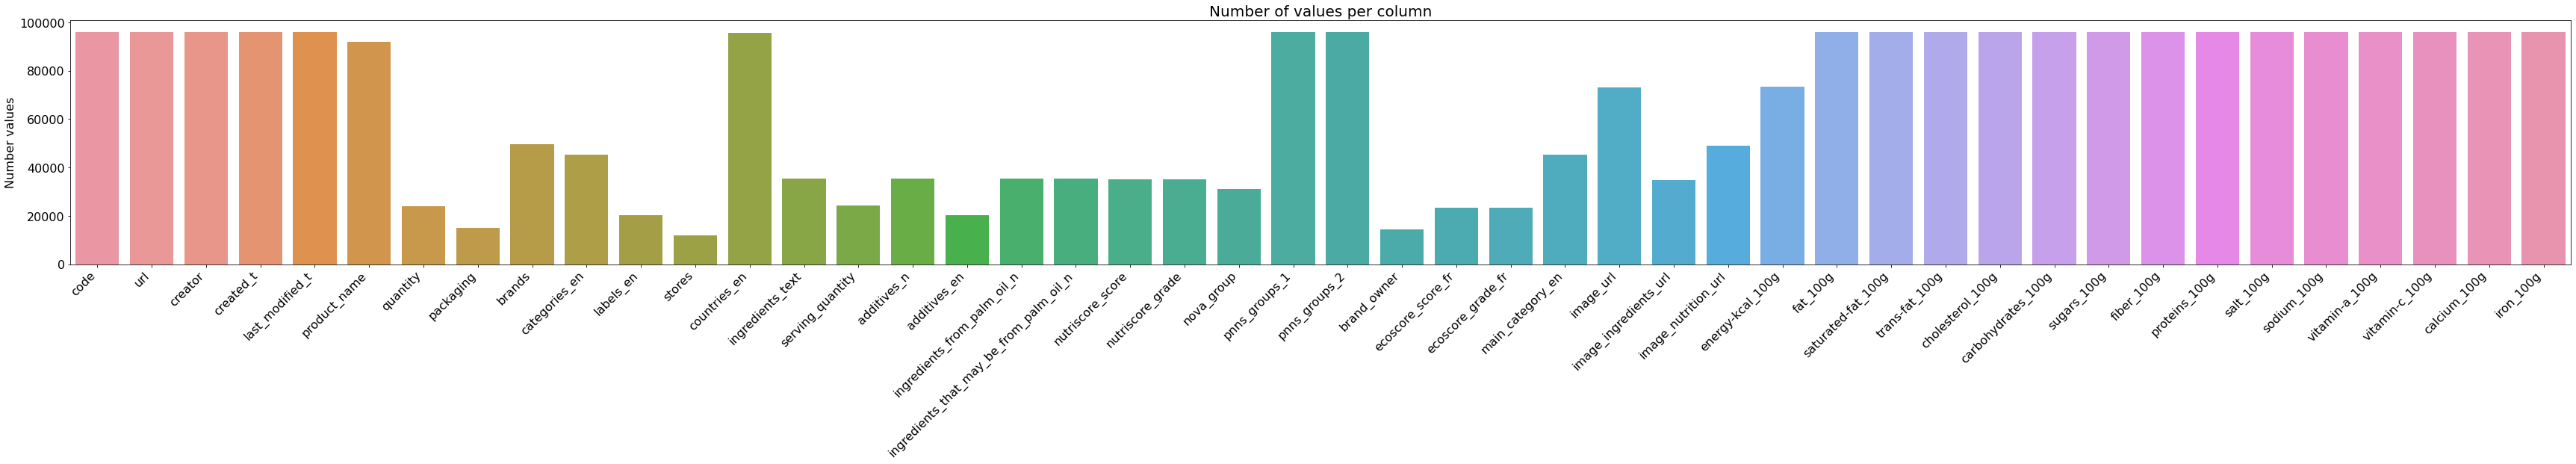

In [4]:
dataframe_distribution_overview(data, figsize=(60, 6))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95978 entries, 5253 to 1916009
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     95978 non-null  object 
 1   url                                      95978 non-null  object 
 2   creator                                  95978 non-null  object 
 3   created_t                                95978 non-null  int64  
 4   last_modified_t                          95978 non-null  int64  
 5   product_name                             91950 non-null  object 
 6   quantity                                 23870 non-null  object 
 7   packaging                                15037 non-null  object 
 8   brands                                   49514 non-null  object 
 9   categories_en                            45311 non-null  object 
 10  labels_en                                

In [6]:
data.describe()

,created_t,last_modified_t,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,ecoscore_score_fr,energy-kcal_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
count,9.597800e+04,9.597800e+04,2.429600e+04,35511.000000,35511.000000,35511.000000,34953.000000,30990.000000,23209.000000,73475.000000,95978.000000,95978.000000,95978.000000,95978.000000,95978.000000,95978.000000,95978.000000,95978.000000,95978.000000,95978.000000,95978.000000,95978.000000,95978.000000,95978.000000
mean,1.557397e+09,1.592435e+09,2.749865e+02,2.028864,0.021881,0.074512,9.127629,3.426202,44.136542,278.574932,31.836577,27.221266,86.249246,86.074094,43.383212,32.306953,75.557700,27.826312,25.969724,25.343991,88.951449,88.594356,86.076079,86.339332
std,5.227922e+07,3.027539e+07,2.819292e+04,2.931305,0.148398,0.315061,8.843376,0.967455,25.953936,583.619691,38.562528,40.723175,34.430441,34.617452,38.506562,39.894744,42.193266,38.254370,42.890671,43.054868,31.349085,31.783784,34.598586,34.342381
min,1.332073e+09,1.348957e+09,0.000000e+00,0.000000,0.000000,0.000000,-14.000000,1.000000,-19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.522993e+09,1.582097e+09,2.800000e+01,0.000000,0.000000,0.000000,2.000000,3.000000,27.000000,101.000000,1.666667,0.400000,100.000000,100.000000,5.450000,1.100000,25.000000,2.600000,0.137500,0.055000,100.000000,100.000000,100.000000,100.000000
50%,1.569164e+09,1.594553e+09,5.200000e+01,1.000000,0.000000,0.000000,10.000000,4.000000,38.000000,261.000000,13.400000,4.200000,100.000000,100.000000,34.505000,8.863571,100.000000,8.400000,1.050000,0.420000,100.000000,100.000000,100.000000,100.000000
75%,1.597972e+09,1.616243e+09,1.142500e+02,3.000000,0.000000,0.000000,16.000000,4.000000,65.000000,400.000000,46.430000,24.000000,100.000000,100.000000,79.000000,62.000000,100.000000,25.700000,93.356250,37.342500,100.000000,100.000000,100.000000,100.000000
max,1.629333e+09,1.629333e+09,4.394438e+06,41.000000,2.000000,4.000000,37.000000,4.000000,125.000000,137000.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


***
# 4 Categorization

In [7]:
categs = data.select_dtypes(include="object")
categs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95978 entries, 5253 to 1916009
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   code                   95978 non-null  object
 1   url                    95978 non-null  object
 2   creator                95978 non-null  object
 3   product_name           91950 non-null  object
 4   quantity               23870 non-null  object
 5   packaging              15037 non-null  object
 6   brands                 49514 non-null  object
 7   categories_en          45311 non-null  object
 8   labels_en              20421 non-null  object
 9   stores                 11993 non-null  object
 10  countries_en           95684 non-null  object
 11  ingredients_text       35511 non-null  object
 12  additives_en           20361 non-null  object
 13  nutriscore_grade       34953 non-null  object
 14  pnns_groups_1          95950 non-null  object
 15  pnns_groups_2 

In [8]:
categs.drop(columns=["code", "url", "quantity", "nutriscore_grade", "ecoscore_grade_fr", "image_url", "image_ingredients_url", "image_nutrition_url"], inplace=True)
categs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95978 entries, 5253 to 1916009
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   creator           95978 non-null  object
 1   product_name      91950 non-null  object
 2   packaging         15037 non-null  object
 3   brands            49514 non-null  object
 4   categories_en     45311 non-null  object
 5   labels_en         20421 non-null  object
 6   stores            11993 non-null  object
 7   countries_en      95684 non-null  object
 8   ingredients_text  35511 non-null  object
 9   additives_en      20361 non-null  object
 10  pnns_groups_1     95950 non-null  object
 11  pnns_groups_2     95950 non-null  object
 12  brand_owner       14482 non-null  object
 13  main_category_en  45311 non-null  object
dtypes: object(14)
memory usage: 11.0+ MB


/opt/anaconda/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
def categorize(feature):
    new_feature = feature.astype("category").cat.codes
    return new_feature

In [10]:
categs_to_nums = categs.apply(lambda col: categorize(col))
categs_to_nums

,creator,product_name,packaging,brands,categories_en,labels_en,stores,countries_en,ingredients_text,additives_en,pnns_groups_1,pnns_groups_2,brand_owner,main_category_en
5253,1567,31244,-1,-1,7875,-1,-1,708,5491,2197,9,34,2356,807
9982,2147,32385,-1,8725,6838,-1,745,708,10720,1246,11,40,4161,2781
3697,1815,62478,-1,3900,2820,2234,-1,318,17313,6197,3,24,-1,1942
6251,1567,14400,-1,-1,7875,-1,-1,708,23494,1862,9,34,4161,807
9165,2147,41073,-1,15925,2667,-1,-1,708,17113,9251,4,10,-1,1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919050,713,75013,-1,9926,-1,-1,-1,542,-1,-1,11,40,-1,-1
1911392,2281,-1,-1,-1,-1,4687,-1,670,-1,-1,11,40,-1,-1
1912771,1084,22054,-1,-1,-1,-1,-1,318,-1,-1,11,40,-1,-1
1918308,1084,31118,-1,-1,-1,-1,-1,548,-1,-1,11,40,-1,-1


In [11]:
cols = categs_to_nums.columns
cols

Index(['creator', 'product_name', 'packaging', 'brands', 'categories_en', 'labels_en', 'stores', 'countries_en', 'ingredients_text', 'additives_en', 'pnns_groups_1', 'pnns_groups_2', 'brand_owner', 'main_category_en'], dtype='object')

In [12]:
for col in cols:
    categs_to_nums.rename(columns={col: col + "_CATEG"}, inplace=True)

categs_to_nums

,creator_CATEG,product_name_CATEG,packaging_CATEG,brands_CATEG,categories_en_CATEG,labels_en_CATEG,stores_CATEG,countries_en_CATEG,ingredients_text_CATEG,additives_en_CATEG,pnns_groups_1_CATEG,pnns_groups_2_CATEG,brand_owner_CATEG,main_category_en_CATEG
5253,1567,31244,-1,-1,7875,-1,-1,708,5491,2197,9,34,2356,807
9982,2147,32385,-1,8725,6838,-1,745,708,10720,1246,11,40,4161,2781
3697,1815,62478,-1,3900,2820,2234,-1,318,17313,6197,3,24,-1,1942
6251,1567,14400,-1,-1,7875,-1,-1,708,23494,1862,9,34,4161,807
9165,2147,41073,-1,15925,2667,-1,-1,708,17113,9251,4,10,-1,1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919050,713,75013,-1,9926,-1,-1,-1,542,-1,-1,11,40,-1,-1
1911392,2281,-1,-1,-1,-1,4687,-1,670,-1,-1,11,40,-1,-1
1912771,1084,22054,-1,-1,-1,-1,-1,318,-1,-1,11,40,-1,-1
1918308,1084,31118,-1,-1,-1,-1,-1,548,-1,-1,11,40,-1,-1


In [13]:
data = data.join([categs_to_nums])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95978 entries, 5253 to 1916009
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   code                                     95978 non-null  object 
 1   url                                      95978 non-null  object 
 2   creator                                  95978 non-null  object 
 3   created_t                                95978 non-null  int64  
 4   last_modified_t                          95978 non-null  int64  
 5   product_name                             91950 non-null  object 
 6   quantity                                 23870 non-null  object 
 7   packaging                                15037 non-null  object 
 8   brands                                   49514 non-null  object 
 9   categories_en                            45311 non-null  object 
 10  labels_en                                

***
# 5 Global correlations

***
## 5.1 Original dataset

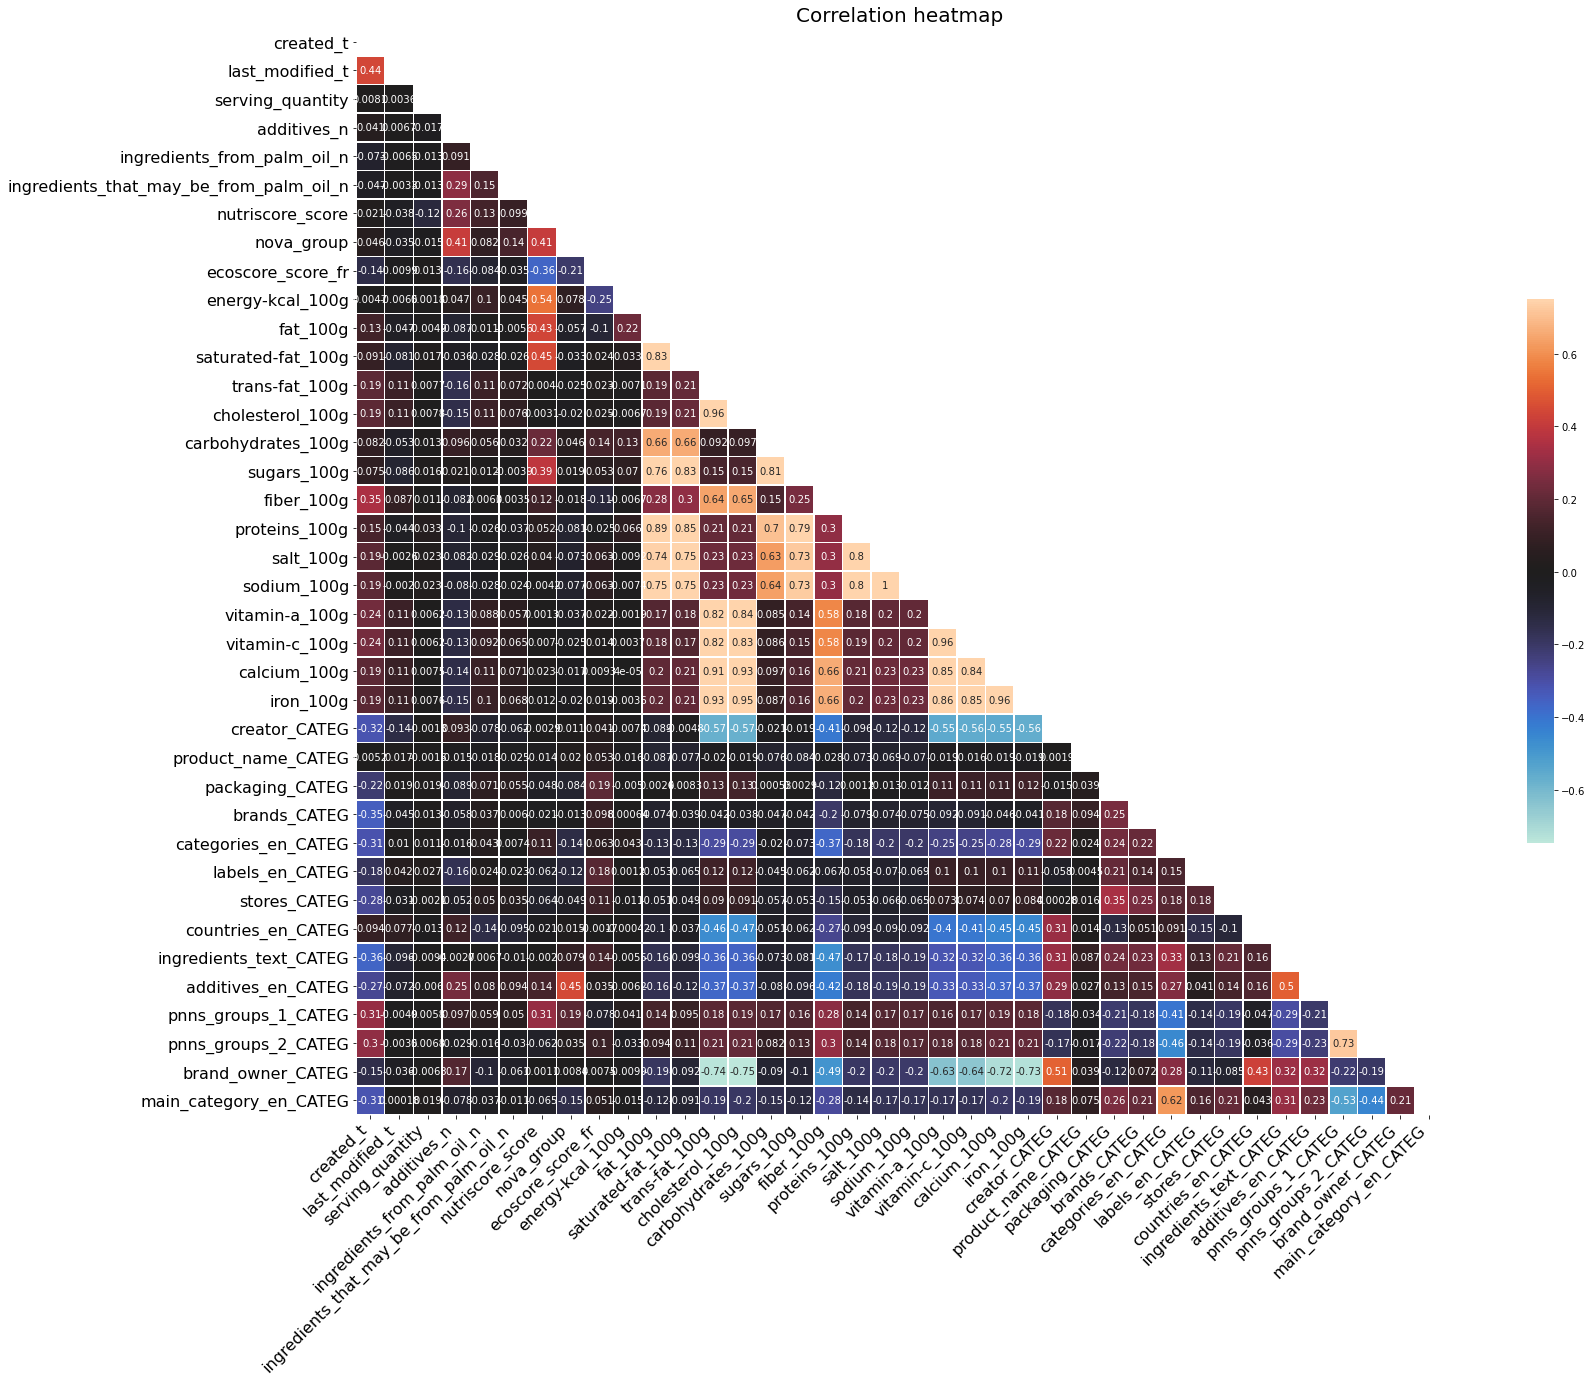

In [15]:
correlation_heatmap(data)

***
## 5.2 Filtered dataset

In [16]:
data = data.loc[:, data.columns.difference(data.loc[:, "energy-kcal_100g":"iron_100g"].columns)]

In [17]:
data = data.loc[:, data.columns.difference(["created_t", "last_modified_t", "categories_en_CATEG", "creator_CATEG", "product_name_CATEG", "serving_quantity", "countries_en_CATEG", "labels_en_CATEG", "brand_owner_CATEG"])]

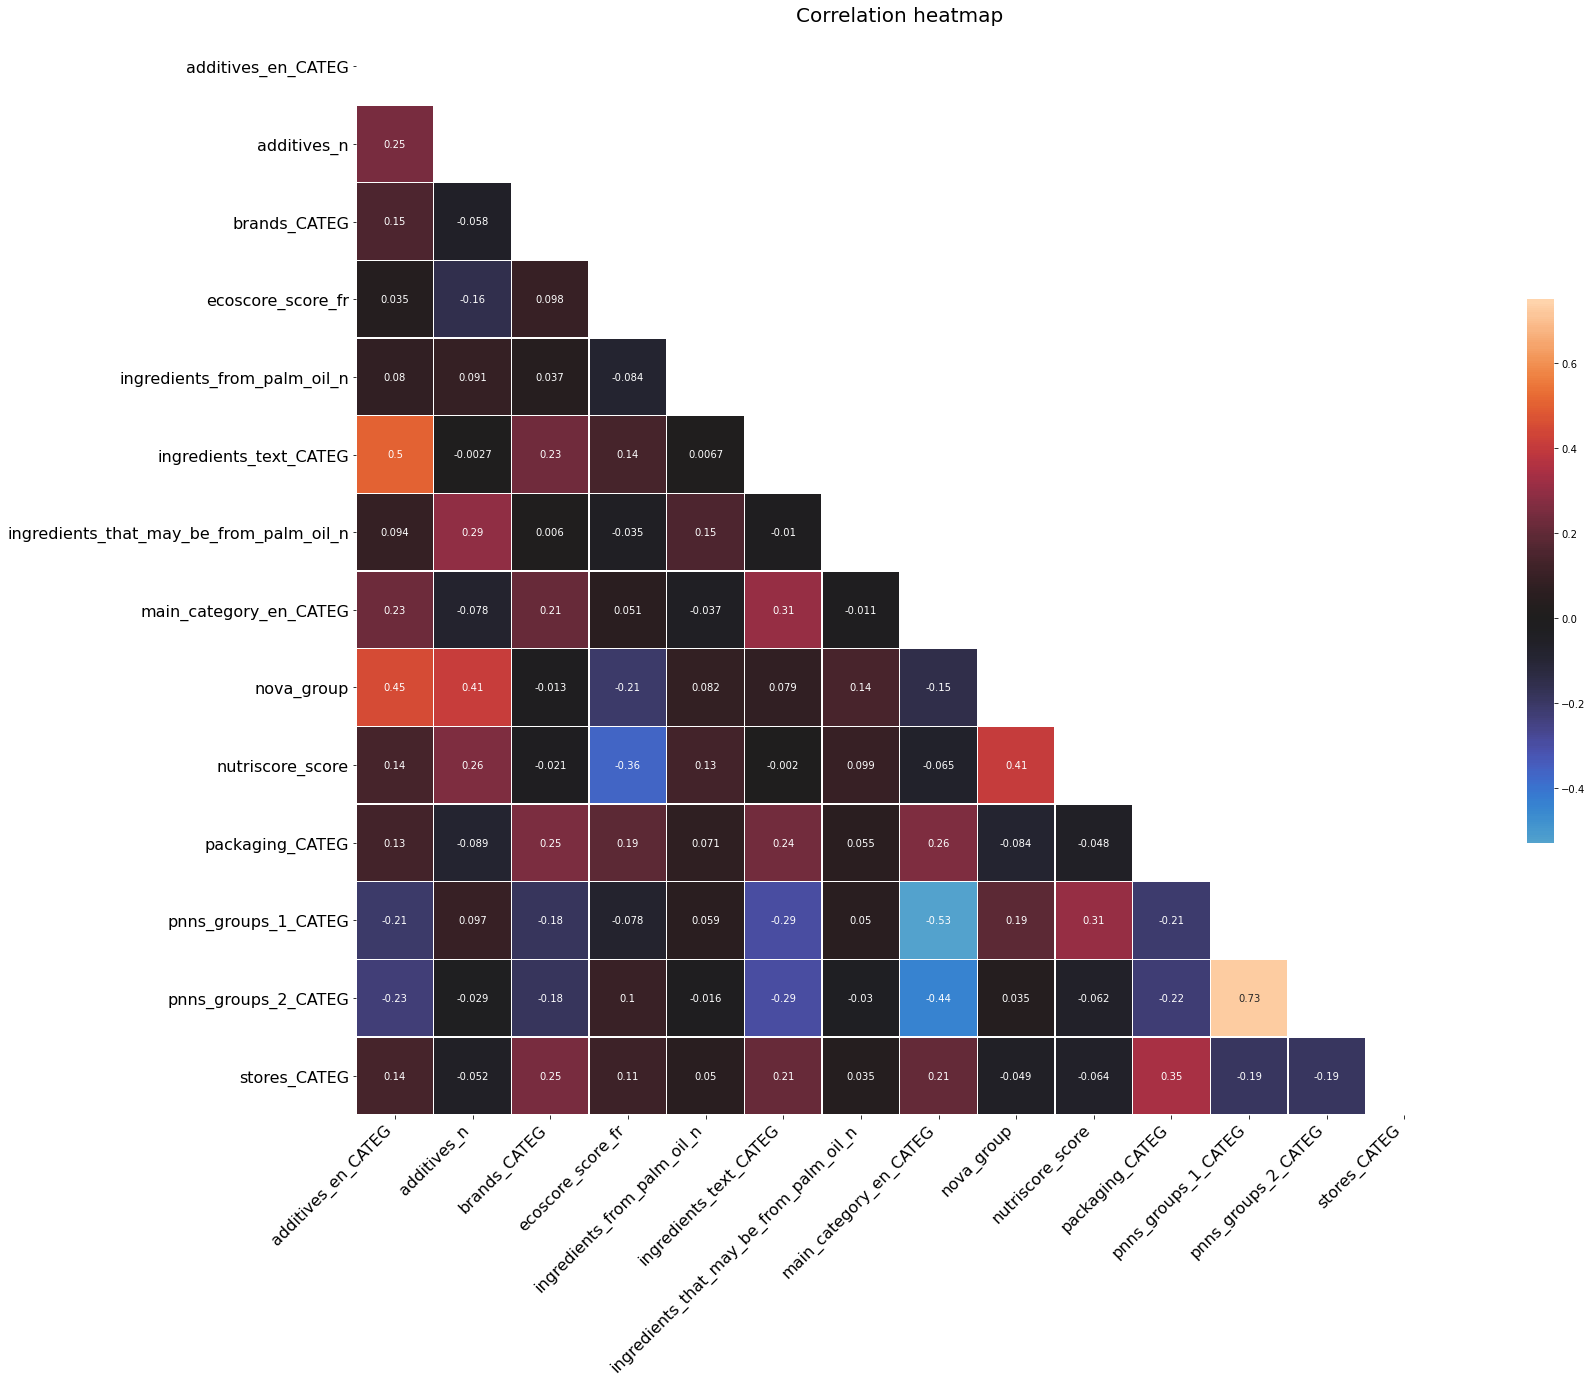

In [18]:
correlation_heatmap(data)

***
# 6 Nutriscore / Ecoscore trends

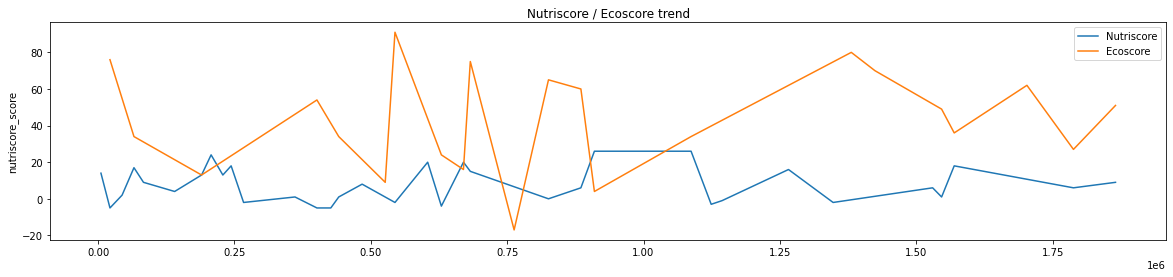

In [19]:
feature_trend_bivar(data, "nutriscore_score", "Nutriscore", "ecoscore_score_fr", "Ecoscore", 1000)

Nutriscore: the bigger the value, the worst the product is.  
Ecoscore: the bigger the value, the worst the environemental impact is.

## Conclusion:
The worst is a product for the health (high nutriscore), the better it is for the environement (low ecoscore).

***
# 7 Nutriscore / Nova_group trends

In [20]:
data["nova_group"] = data["nova_group"] ** 2
# data["nova_group"] = np.sqrt(data["nova_group"])

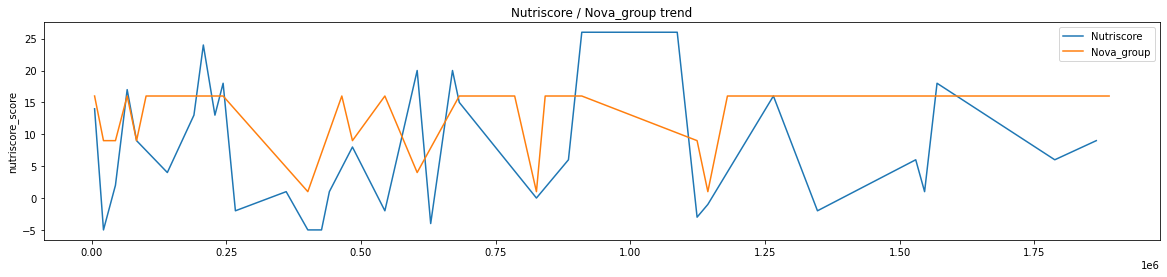

In [21]:
feature_trend_bivar(data, "nutriscore_score", "Nutriscore", "nova_group", "Nova_group", 1000)

***
# 8 Nutriscore / Ecoscore distribution

<Figure size 720x432 with 0 Axes>

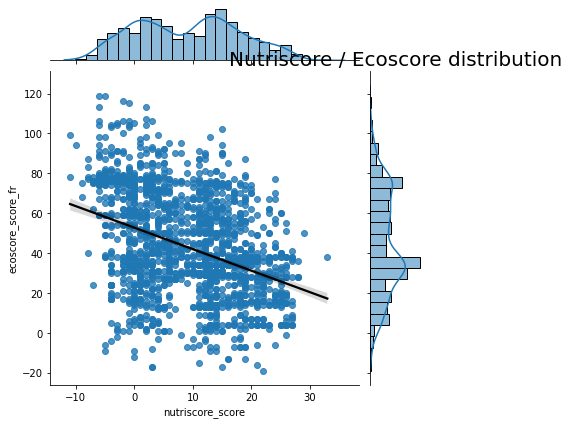

In [22]:
feature_distribution_bivar(data, "nutriscore_score", "Nutriscore", "ecoscore_score_fr", "Ecoscore", divider=10)

***
# 9 Nutriscore / countries disribution

In [23]:
data.iloc[10:].countries_en.head(10)

3682    United States
5069    United States
5740    United States
5558    United States
3848    United States
7069    United States
4462    United States
7106    United States
9397    United States
7434    United States
Name: countries_en, dtype: object

In [24]:
def keep_last_country(row):
    cotr = row["countries_en"]
    splt = cotr.split(",")
    row["countries_en"] = splt[-1]
    return row

data = data[data.countries_en.notna()].apply(lambda row: keep_last_country(row), axis=1)

In [25]:
data.iloc[10:].countries_en.head(10)

3682    United States
5069    United States
5740    United States
5558    United States
3848    United States
7069    United States
4462    United States
7106    United States
9397    United States
7434    United States
Name: countries_en, dtype: object

Let's see now how the nutriscore is distributed by country.

In [26]:
data_by_countries_nutriscore = data.groupby(["countries_en", "nutriscore_grade"]).nutriscore_grade.agg([len]).reset_index()
data_by_countries_nutriscore.head()

,countries_en,nutriscore_grade,len
0,Albania,b,1
1,Albania,d,1
2,Algeria,a,2
3,Algeria,b,3
4,Algeria,c,1


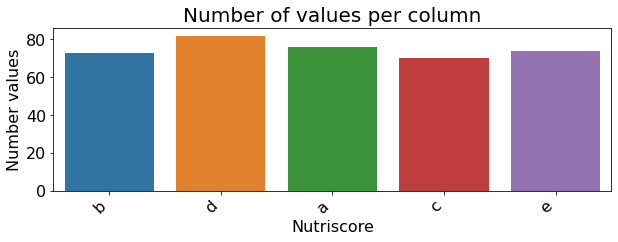

In [27]:
feature_distribution_univar(data_by_countries_nutriscore, "nutriscore_grade", "Nutriscore")

In [28]:
nutriscore_distrib_per_country = data_by_countries_nutriscore.loc[data_by_countries_nutriscore.countries_en.isin(["France", "Germany", "Belgium", "Canada", "Italy", "Mexico", "Netherlands", "Poland", "Portugal", "Spain", "Sweden", "Switzerland", "United Kingdom", "United States"])]

<Figure size 2160x432 with 0 Axes>

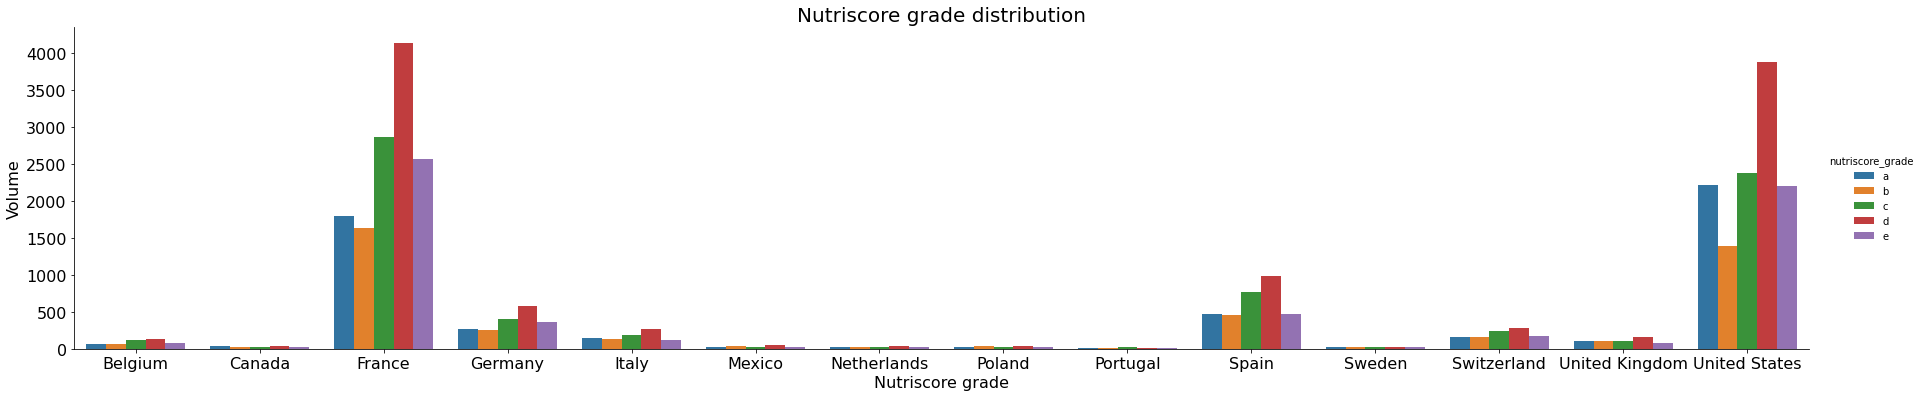

In [29]:
plt.figure(figsize=(30,6))

sns.catplot(x="countries_en", y="len", hue="nutriscore_grade", data=nutriscore_distrib_per_country, kind="bar", height=5, aspect=5)

plt.title("Nutriscore grade distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Nutriscore grade", size=16)
plt.ylabel("Volume", size=16)
plt.show()

***
# 10 Ecoscore / countries distribution

Let's see now how the ecoscore is distributed by country.

In [30]:
data_by_countries_ecoscore = data.groupby(["countries_en", "ecoscore_grade_fr"]).ecoscore_grade_fr.agg([len]).reset_index()
data_by_countries_ecoscore.head()

,countries_en,ecoscore_grade_fr,len
0,Albania,c,1
1,Albania,e,1
2,Algeria,b,2
3,Algeria,c,2
4,Algeria,d,4


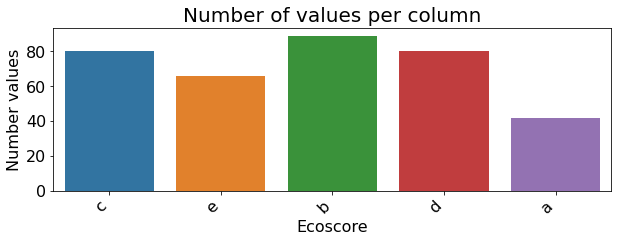

In [31]:
feature_distribution_univar(data_by_countries_ecoscore, "ecoscore_grade_fr", "Ecoscore")

In [32]:
ecoscore_distrib_per_country = data_by_countries_ecoscore.loc[data_by_countries_ecoscore.countries_en.isin(["France", "Germany", "Belgium", "Canad", "Italy", "Mexico", "Netherlands", "Poland", "Portugal", "Spain", "Sweden", "Switzerland", "United Kingdom", "United States"])]

<Figure size 2160x432 with 0 Axes>

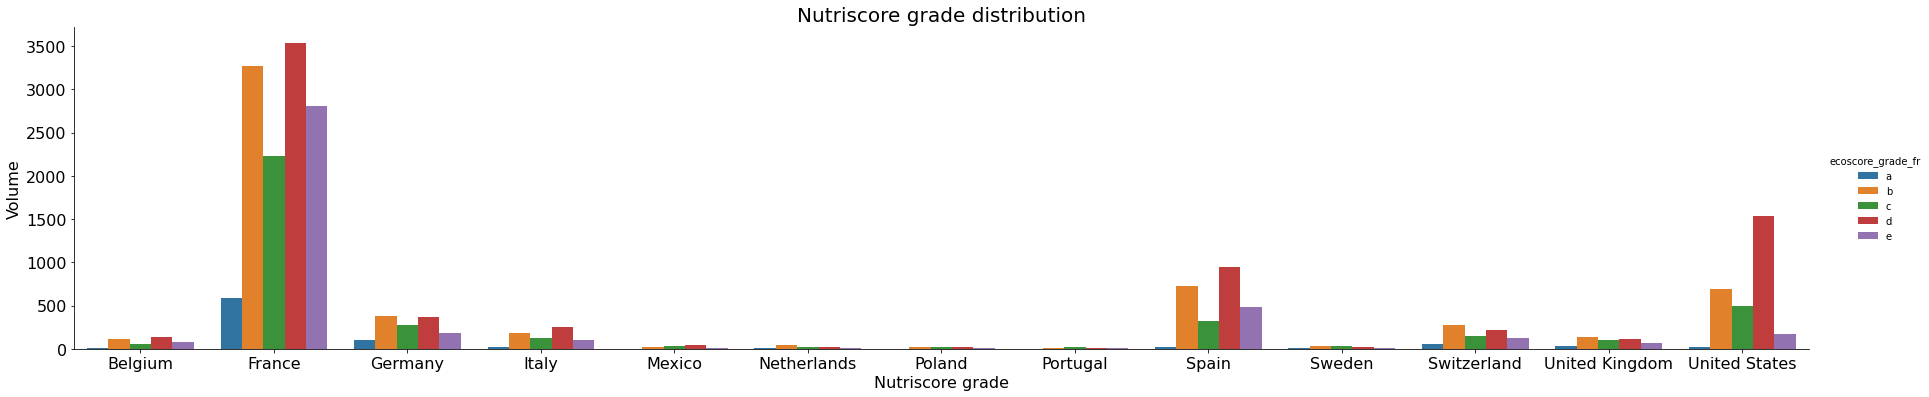

In [33]:
plt.figure(figsize=(30,6))

sns.catplot(x="countries_en", y="len", hue="ecoscore_grade_fr", data=ecoscore_distrib_per_country, kind="bar", height=5, aspect=5)

plt.title("Nutriscore grade distribution", size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("Nutriscore grade", size=16)
plt.ylabel("Volume", size=16)
plt.show()

***
# ---

In [34]:
data.brands.describe()

count         49378
unique        21426
top       Carrefour
freq            785
Name: brands, dtype: object

In [35]:
data.brand_owner.describe()

count                     14480
unique                     4614
top       Wal-Mart Stores, Inc.
freq                        257
Name: brand_owner, dtype: object

In [36]:
data.loc[data.brands.notna() & data.brand_owner.notna()].loc[:, ["brands", "brand_owner"]].head(20)

,brands,brand_owner
9982,Kroger,The Kroger Co.
7222,Kroger,The Kroger Co.
4510,"Ferrero Collection, Ferrero U.S.A. Incorporated","Ferrero U.S.A., Incorporated"
1319,"Vintage, Vintage Bee",All American Products Co. Inc.
3682,"Jewel Osco, Long Grove Confectionery Co.",Long Grove Confectionery Co.
5740,Kroger,The Kroger Co.
5558,P$$T...,The Kroger Co.
9397,"Private Selection, The Kroger Co.",The Kroger Co.
7434,Kroger,The Kroger Co.
9071,Kroger,The Kroger Co.


In [37]:
data.loc[data.brands == "Carrefour"].loc[:, ["brands", "brand_owner"]].head(20)

,brands,brand_owner
294841,Carrefour,NaN
299879,Carrefour,NaN
296012,Carrefour,NaN
292525,Carrefour,NaN
297714,Carrefour,NaN
294132,Carrefour,NaN
293663,Carrefour,NaN
294374,Carrefour,NaN
294698,Carrefour,NaN
294177,Carrefour,NaN


In [38]:
data.loc[data.brands == "Carrefour"].loc[data.brand_owner.notna()].loc[:, ["brands", "brand_owner"]].head(20)

,brands,brand_owner


In [68]:
def get_lines_from_feature(data, feature: str, delimiter=","):
    for i, row in data.iterrows():
        if data.iloc[i].loc[:,[feature]].isna():
            continue
        print(f"row[feature]: {row[feature]}")
        elts = row[feature].split(delimiter)
        for elt in elts:
            new_row = row.copy()
            new_row[feature] = elt.strip()
            pd.concat([data, new_row])
    return data


def separate_lines(dataset):
    lines_to_add = pd.DataFrame()
    original_dataset = dataset.apply(lambda row: row, axis="columns")
    return original_dataset["brands"]


In [67]:
get_lines_from_feature(data.iloc[:20], "brands")

IndexError: positional indexers are out-of-bounds

In [ ]:
separate_lines(data.iloc[:20,:])